In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
holdout = pd.read_csv('test.csv')

In [3]:
holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Function Building

In [4]:
# %load functions.py
def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    train = process_age(train)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    train = process_fare(train)
    """
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    """Process the Cabin column into pre-defined 'bins' 

    Usage
    ------

    train = process_cabin(train)
    """
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    train = process_titles(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

def megafunc(df):
    df = process_missing(df)
    df = process_age(df)
    df = process_fare(df)
    df = process_cabin(df)
    df = process_titles(df)
    
    df = create_dummies(df, 'Age_categories')
    df = create_dummies(df, 'Fare_categories')
    df = create_dummies(df, 'Title')
    df = create_dummies(df, 'Cabin_type')
    df = create_dummies(df, 'Sex')
    
    return df
        

In [5]:
train = megafunc(train)
holdout = megafunc(holdout)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   PassengerId                 891 non-null    int64   
 1   Survived                    891 non-null    int64   
 2   Pclass                      891 non-null    int64   
 3   Name                        891 non-null    object  
 4   Sex                         891 non-null    object  
 5   Age                         891 non-null    float64 
 6   SibSp                       891 non-null    int64   
 7   Parch                       891 non-null    int64   
 8   Ticket                      891 non-null    object  
 9   Fare                        891 non-null    float64 
 10  Embarked                    891 non-null    object  
 11  Age_categories              891 non-null    category
 12  Fare_categories             891 non-null    category
 13  Cabin_type          

# Exploration

In [7]:
train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [8]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [9]:
train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [10]:
train['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

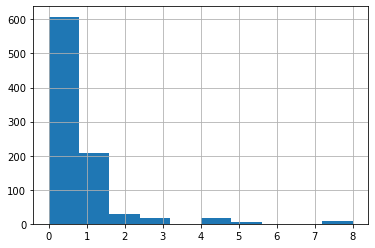

In [11]:
train['SibSp'].hist()
plt.show()

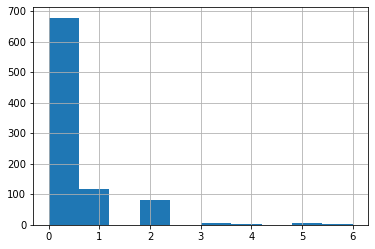

In [12]:
train['Parch'].hist()
plt.show()

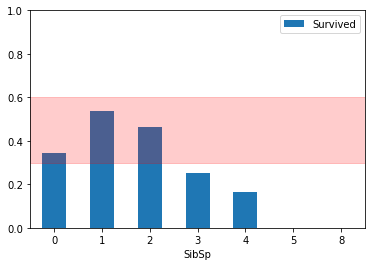

In [13]:
sib_pivot = train.pivot_table(index='SibSp', values='Survived')
sib_pivot.plot.bar(rot=0)
plt.axhspan(0.3, 0.6, color='red', alpha=0.2)
plt.ylim(0, 1)

plt.show()

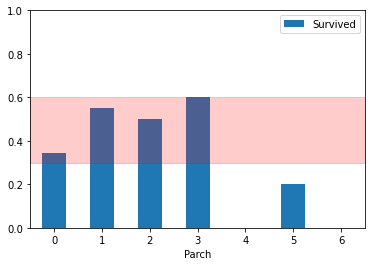

In [14]:
parch_pivot = train.pivot_table(index='Parch', values='Survived')
parch_pivot.plot.bar(rot=0)
plt.axhspan(0.3, 0.6, color='red', alpha=0.2)
plt.ylim(0, 1)


plt.show()

In [15]:
family_df = train[['Survived', 'SibSp', 'Parch']]

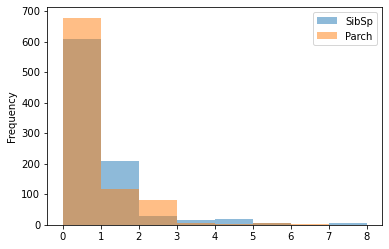

In [16]:
family_df.drop('Survived', axis=1).plot.hist(alpha=0.5, bins=8)
plt.show()

In [17]:
family_df_new = family_df.copy()


In [18]:
family_df_new['additional_family_members'] = family_df_new[['SibSp', 'Parch']].copy().sum(axis=1)

In [19]:
family_df_new

,Survived,SibSp,Parch,additional_family_members
0,0,1,0,1
1,1,1,0,1
2,1,0,0,0
3,1,1,0,1
4,0,0,0,0
...,...,...,...,...
886,0,0,0,0
887,1,0,0,0
888,0,1,2,3
889,1,0,0,0


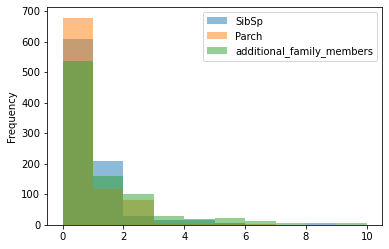

In [20]:
family_df_new.drop('Survived', axis=1).plot.hist(alpha=0.5)
plt.show()

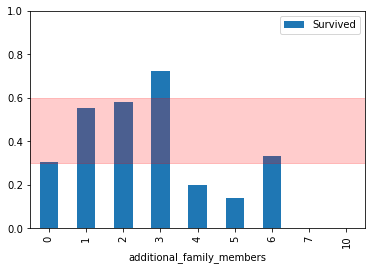

In [21]:
family_pivot = family_df_new.pivot_table(index='additional_family_members', values='Survived')
family_pivot.plot.bar()
plt.axhspan(0.3, 0.6, color='red', alpha=0.2)
plt.ylim(0, 1)
plt.show()

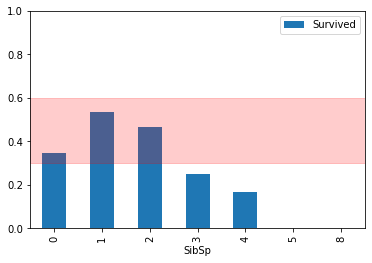

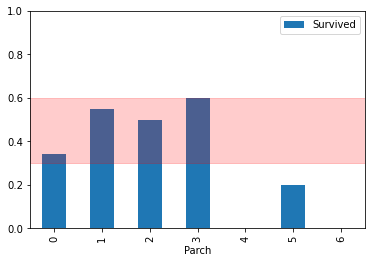

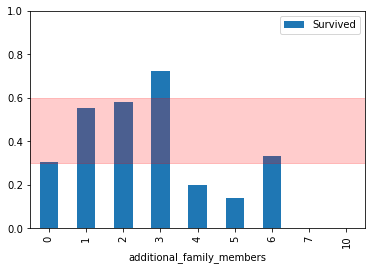

In [22]:
for col in family_df_new.columns.drop('Survived'):
    family_pivot = family_df_new.pivot_table(index=col, values='Survived')
    family_pivot.plot.bar()
    plt.axhspan(0.3, 0.6, color='red', alpha=0.2)
    plt.ylim(0, 1)

plt.show()


From combining the data we have on number of siblings/spouses and number of parents/children, we can see that the survival rates are greatest (above 50%) for passengers with a family size on board of 1, 2, and 3 additional members. 

Of the over 500 passengers with no family members on board, only about 30% survived. Interestingly, as the families get large, there is a sharp decline in survival rate.


# Feature Engineering

From the above finding that only about 30% of the passengers who had no family members on board survived, we can create a new feature: was the passenger alone? 

In [23]:
def process_alone(df):
    df['family_members'] = df[['SibSp', 'Parch']].sum(axis=1)
    cut_points = [-1, 0, 10]
    label_names = ['1', '0']
    df['isalone'] = pd.cut(df['family_members'], cut_points, labels=label_names)
    df['isalone'] = df['isalone'].astype(int)
    df = df.drop('family_members', axis=1)
    return df
    

In [24]:
train = process_alone(train)

In [25]:
holdout = process_alone(holdout)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   PassengerId                 891 non-null    int64   
 1   Survived                    891 non-null    int64   
 2   Pclass                      891 non-null    int64   
 3   Name                        891 non-null    object  
 4   Sex                         891 non-null    object  
 5   Age                         891 non-null    float64 
 6   SibSp                       891 non-null    int64   
 7   Parch                       891 non-null    int64   
 8   Ticket                      891 non-null    object  
 9   Fare                        891 non-null    float64 
 10  Embarked                    891 non-null    object  
 11  Age_categories              891 non-null    category
 12  Fare_categories             891 non-null    category
 13  Cabin_type          

# Feature Selection

In [47]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

def select_features(df):
    df = df.select_dtypes(include=['int64', 'float64', 'uint8'])
    df = df.dropna(axis=1)
    
    all_X = df.drop(['PassengerId', 'Survived'], axis=1)
    all_y = df['Survived']
    
    rf = RandomForestClassifier(random_state=1)
    selector = RFECV(rf, cv=10)
    selector.fit(all_X, all_y)
    
    best_features = list(all_X.columns[selector.support_])
    print(best_features)
    return best_features



In [48]:
first_try = select_features(train)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_categories_Missing', 'Age_categories_Infant', 'Age_categories_Child', 'Age_categories_Teenager', 'Age_categories_Young Adult', 'Age_categories_Adult', 'Age_categories_Senior', 'Fare_categories_0-12', 'Fare_categories_12-50', 'Fare_categories_50-100', 'Fare_categories_100+', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Cabin_type_A', 'Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_Unknown', 'Sex_female', 'Sex_male', 'isalone']


In [52]:
optimal_features = first_try

# Model Selection and Tuning

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [67]:
def select_model(df, list_feats):
    all_X = df[list_feats]
    all_y = df['Survived']
    
    list_dicts = [
        {'name': 'LogisticRegression',
         'estimator': LogisticRegression(),
         'hyperparameters': {
             'solver': ['newton-cg', 'lbfgs', 'liblinear']
             }
        },
        {'name': 'KNeighborsClassifier',
         'estimator': KNeighborsClassifier(),
         'hyperparameters': {
            "n_neighbors": range(1,20,2),
            "weights": ["distance", "uniform"],
            "algorithm": ["ball_tree", "kd_tree", "brute"],
            "p": [1,2]
             }
        },
        {'name': 'RandomForestClassifier',
         'estimator': RandomForestClassifier(random_state=1),
         'hyperparameters': {
            "n_estimators": [4, 6, 9],
            "criterion": ["entropy", "gini"],
            "max_depth": [2, 5, 10],
            "max_features": ["log2", "sqrt"],
            "min_samples_leaf": [1, 5, 8],
            "min_samples_split": [2, 3, 5]
            }           
         }  
    ]
    
    for dictionary in list_dicts:
        print(dictionary['name'])
        grid = GridSearchCV(estimator=dictionary['estimator'], param_grid=dictionary['hyperparameters'], cv=10)
        grid.fit(all_X, all_y)
        dictionary['best_score'] = grid.best_score_
        dictionary['best_params'] = grid.best_params_  
        dictionary['best_estimator'] = grid.best_estimator_
        print(dictionary['best_score'], dictionary['best_params'])
    
    return list_dicts



# grid = GridSearchCV(knn, param_grid=lr_hyperparameters, cv=10)
# grid.fit(all_X, all_y)

In [68]:
come_on = select_model(train, optimal_features)

LogisticRegression


/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

0.8204744069912608 {'solver': 'lbfgs'}
KNeighborsClassifier
0.7767041198501874 {'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
RandomForestClassifier
0.8395505617977527 {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 6}


# Submitting to Kaggle

In [74]:
def save_submission_file(model, features_list, filename='Submission_1.csv'):
    holdout_data = holdout[features_list]
    
    holdout_predictions = model.predict(holdout_data)
    
    submission_df = {
        'PassengerId': holdout['PassengerId'],
        'Survived': holdout_predictions
    }

    submission = pd.DataFrame(submission_df)

    return submission.to_csv(filename, index=False)
    

In [75]:
best_rf_model = come_on[2]['best_estimator']

In [76]:
save_submission_file(best_rf_model, optimal_features)